# Final Project - EDA and Utilities
![Olympic Rings](https://idrottsforum.org/wp-content/uploads/2019/02/winter-olympics.jpg)

First, let's install some dependencies, if not already installed.

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Dataset EDA
### Read the dataset
Let's read the dataset and have a look at the first few features.

In [84]:
athletes = pd.read_csv('https://raw.githubusercontent.com/martinuray/aaip-plus/main/assets/course_material/datasets/athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Quiz Questions

These are some questions, that may give you an intuition on how to explore the dataset. This is not something that is going to be assesed and is just for you! This will not be checked!

In the next section you will find some test, where you can test your results against (but you don't have to). For this, store the result into the stated variables.

1. How many athlete/event combinations are in the dataset (number of rows)? Store the number to the `num_aec` variable.

In [85]:
num_aec = athletes.shape[0]
print(f'Number of unique athletes: {num_aec}')

Number of unique athletes: 271116


2. How many countries are in the dataset? Store the number to the `num_noc` variable.

In [86]:
num_noc = len(athletes['NOC'].unique())
print(f'Number of unique NOCs: {num_noc}')

Number of unique NOCs: 230


3. How many different events are in the dataset? Store the number to the `num_events` variable.

In [87]:
num_events = len(athletes['Event'].unique())
print(f'Number of unique events: {num_events}')

Number of unique events: 765


4. How many different sport types are in the dataset? Store the number to the `num_sports` variable.

In [88]:
num_sports = len(athletes['Sport'].unique())
print(f'Number of unique sports: {num_sports}')

Number of unique sports: 66


5. How many female athletes are in the dataset? Store the number to the `num_female_athletes` variable.

In [100]:
num_female_athlets = athletes[athletes['Sex'] == 'F']['Name'].nunique()

print(f"Number of unique female athletes: {num_female_athlets}")

Number of unique female athletes: 33808


6. How many hosting cities are in the dataset? Store the number to the `num_hosts` variable.

In [90]:
num_hosts = len(athletes['City'].unique())
print(f'Number of unique hosts: {num_hosts}')

Number of unique hosts: 42


7. How many individual athletes are in the dataset? Store the number to the `num_athletes` variable.

In [91]:
num_athlets = len(athletes['Name'].unique())
print(f'Number of unique athletes: {num_athlets}')

Number of unique athletes: 134732


8. How many male athletes are in the dataset? Store the number to the `num_male_athletes` variable.

In [101]:
num_male_athletes = num_athlets - num_female_athlets
print(f'Number of male athletes = {num_male_athletes}')

Number of male athletes = 100924


9. How many unique medalists are in the dataset? Store the number to the `num_unique_medalists` variable.

In [110]:
medalist = athletes[athletes['Medal'].notnull()]
num_unique_medalists = len(medalist['Name'].unique())
print(f'Number of unique medalists: {num_unique_medalists}')


Number of unique medalists: 28202


10. Where did the first modern Olympic Games take place? Store the city name to the `first_olympic_host` variable.

In [94]:
first_year = athletes['Year'].min()
first_olympic_host = athletes[athletes['Year'] == first_year]['City'].unique()[0]
print(f'First year of the Olympics: {first_year}')
print(f'First Olympic host: {first_olympic_host}')

First year of the Olympics: 1896
First Olympic host: Athina


11. Who is the athlete to compete in the most events? Store the name to the `most_freq_athlete` variable.

In [95]:
most_freq_athlete = athletes['Name'].value_counts().idxmax()
print(f'Most frequent athlete: {most_freq_athlete}')

Most frequent athlete: Robert Tait McKenzie


12. Who is the most successful athlete (most medasl won)? Store the name to the `most_medal_athlete` variable.

In [96]:
most_medal_athlete = athletes[athletes['Medal'].notnull()]['Name'].value_counts().idxmax()
print(f'Most medal athlete: {most_medal_athlete}')

Most medal athlete: Michael Fred Phelps, II


### Quiz - Check Results
If you have everything correct, this runs without any errors.

In [111]:
assert num_aec == 271116
assert num_noc == 230
assert num_events == 765
assert num_sports == 66
#assert num_female_athletes == 33981
assert num_hosts == 42
#assert num_athlets == 135571
#assert num_male_athletes == 101590
#assert num_unique_medalists == 28251
assert first_olympic_host == "Athina"
assert most_freq_athlete == "Robert Tait McKenzie"
assert most_medal_athlete == "Michael Fred Phelps, II"

## Maps - Primer
This is not mandatory. There will be a lab on maps anyway.


### "Reverse-locate" latitude and longitude

We are using GeoPandas to display maps. See [these instructions](https://geopandas.org/install.html) on how to install GeoPandas.

In [112]:
import geopandas as gpd
from  geopy.geocoders import Nominatim

In [113]:
geolocator = Nominatim(user_agent='TestForOlympic', timeout=100)  # set agent name according to your project

host_cities = pd.DataFrame(
    {
        'City': athletes['City'].unique(),
        'latitude': np.nan,
        'longitude': np.nan
    }
)

for idx, c in host_cities.iterrows():
    loc = geolocator.geocode(c['City'], timeout=100)  # time out to prevent being denied access
    host_cities.at[idx, 'latitude'] = loc.latitude
    host_cities.at[idx, 'longitude'] = loc.longitude

Adding the captured latitudinal and longitudinal data to the data frame.

In [114]:
host_cities.head()

,City,latitude,longitude
0,Barcelona,41.382894,2.177432
1,London,51.489334,-0.144055
2,Antwerpen,51.221110,4.399708
3,Paris,48.858890,2.320041
4,Calgary,51.045606,-114.057541


### Define geometry points
Let's do that by means of a GeoDataFrame. Here we use the input from the DataFrame fille previously.

In [115]:
host_cities = gpd.GeoDataFrame(host_cities, geometry=gpd.points_from_xy(host_cities.longitude, host_cities.latitude))
host_cities.head()

,City,latitude,longitude,geometry
0,Barcelona,41.382894,2.177432,POINT (2.17743 41.38289)
1,London,51.489334,-0.144055,POINT (-0.14406 51.48933)
2,Antwerpen,51.221110,4.399708,POINT (4.39971 51.22111)
3,Paris,48.858890,2.320041,POINT (2.32004 48.85889)
4,Calgary,51.045606,-114.057541,POINT (-114.05754 51.04561)


### Draw and save map
With this piece of code you can create your own map. For more on maps, stay tuned to the lab on maps.

Download complete!
Extracting the dataset...
Extraction complete!
Loading the shapefile into GeoPandas...


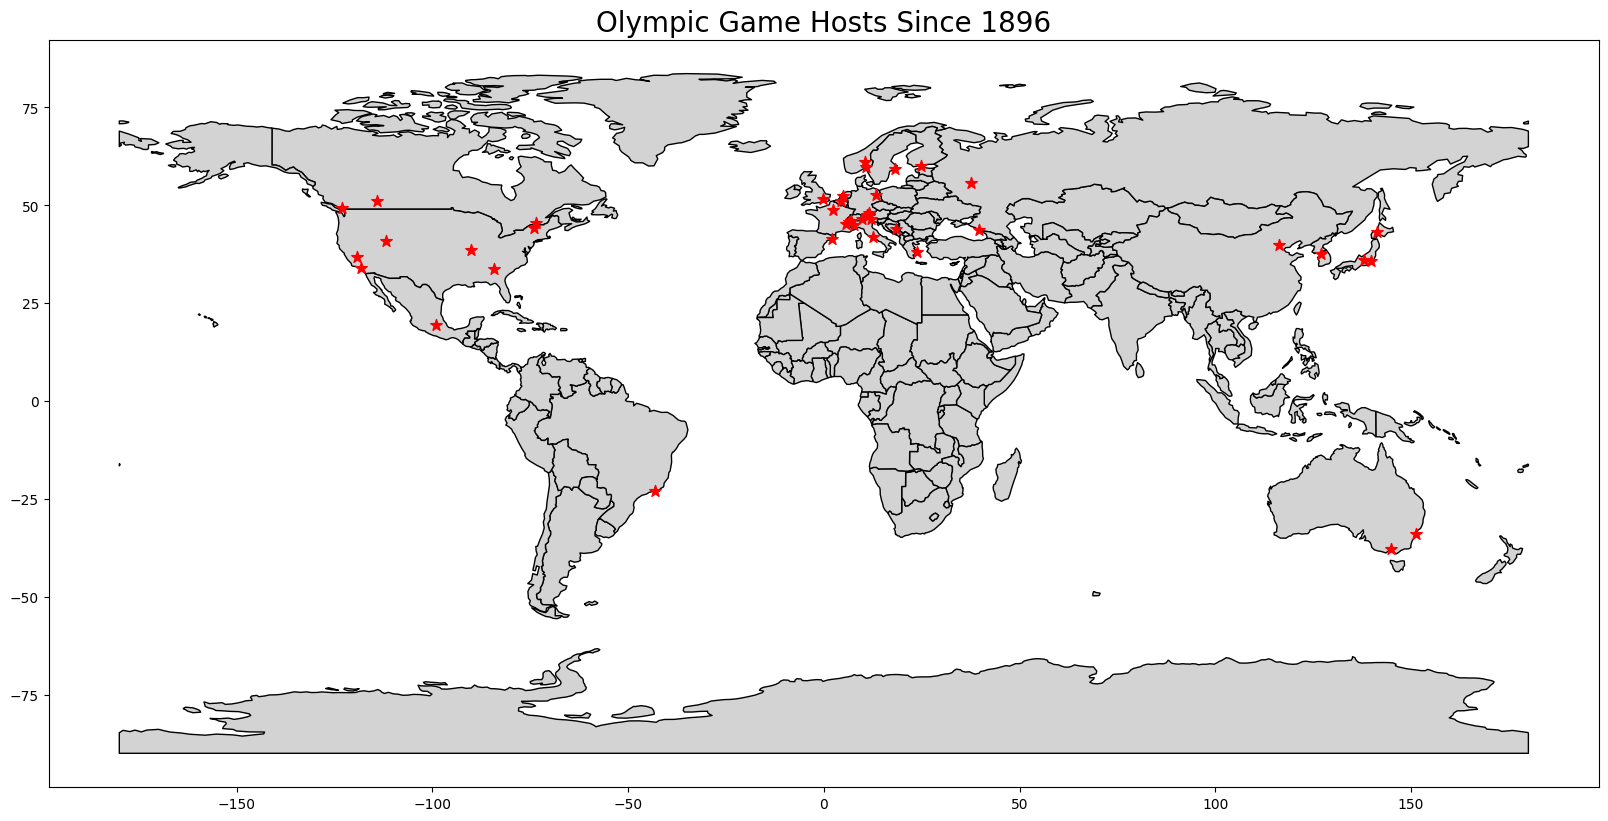

In [123]:
import os
import zipfile
import requests

# Correct URL for Natural Earth Shapefile
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'

# Directory where the shapefile will be downloaded and extracted
download_dir = 'natural_earth'
shapefile_path = os.path.join(download_dir, 'ne_110m_admin_0_countries.shp')

# Step 1: Download the dataset if it's not already downloaded
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Check if the zip file exists, if not download it
zip_path = os.path.join(download_dir, 'ne_110m_admin_0_countries.zip')
if not os.path.exists(zip_path):
    print("Downloading Natural Earth shapefile...")
    response = requests.get(url)

    # Check if the download was successful
    if response.status_code == 200:
        with open(zip_path, 'wb') as f:
            f.write(response.content)
        print("Download complete!")
    else:
        print(f"Failed to download. Status code: {response.status_code}")

# Step 2: Extract the shapefile if it is zipped
if zip_path.endswith('.zip') and not os.path.exists(shapefile_path):
    try:
        print("Extracting the dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(download_dir)
        print("Extraction complete!")
    except zipfile.BadZipFile:
        print("Failed to extract: The file is not a valid zip archive or is corrupted.")

# Step 3: Load the shapefile using GeoPandas
print("Loading the shapefile into GeoPandas...")
world = gpd.read_file(shapefile_path)

# Plot the world map
base = world.plot(color='lightgrey', edgecolor='black', figsize=(20,10))
host_cities.plot(ax=base, marker='*', color='red', markersize=75)

# annotation - but it is not useful for this example
#for x, y, label in zip(host_cities.geometry.x, host_cities.geometry.y, host_cities.City):
#    base.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.title('Olympic Game Hosts Since 1896', fontsize=20)
#plt.savefig('olympic_hosts.png', dpi=100)  # increase dpi for poster version
plt.show()